In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import pandas as pd
import numpy as np
import os

## 1) Построить гистограммы

In [2]:
reads_data = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')

In [3]:
reads_data.head(10)

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
5,284,8048,7094,104,864,241,24.0,57.0,26.0,NaN,0.002687,0.002429,NaN,0.006792
6,285,8046,679,3245,4134,5,113.0,87.0,3054.0,NaN,0.013775,0.378969,NaN,0.010085
7,286,8041,363,3473,4215,9,NaN,171.0,123.0,3196.0,NaN,0.014827,0.396426,0.020433
8,287,8044,4665,646,2743,69,68.0,287.0,NaN,300.0,0.007369,NaN,0.037132,0.035034
9,288,8046,3443,1867,2752,431,NaN,200.0,27.0,1639.0,NaN,0.003225,0.203715,0.024011


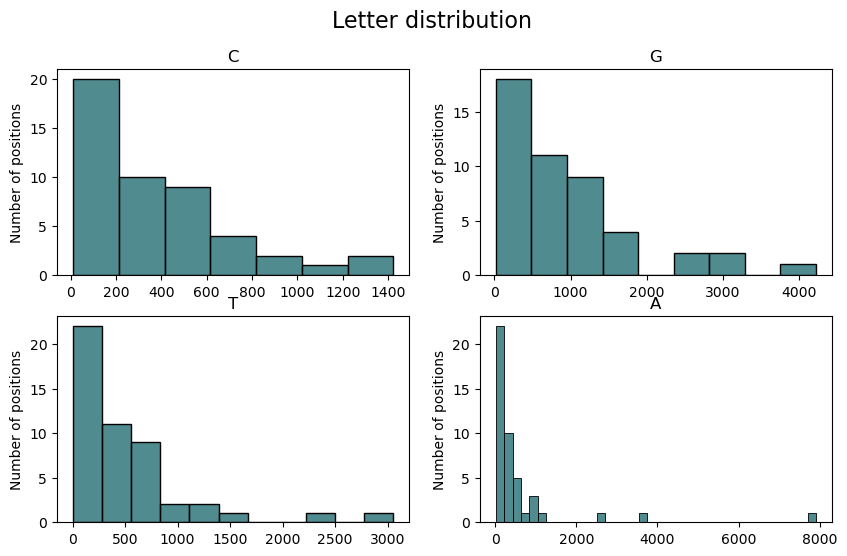

In [4]:
# Не очень хорошо понял этот датасет. Ну вот как понял:
fig, axes = plt.subplots(nrows=2, ncols=2 )

fig.set_figwidth(10)
fig.set_figheight(6)
fig.set_dpi(100)
fig.suptitle('Letter distribution', fontsize=16)
letters = ['A','T','G','C']
for ax in axes.flat:
    col = letters.pop()
    sns.histplot(reads_data[col],ax = ax, color='#15656B')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Number of positions')
    

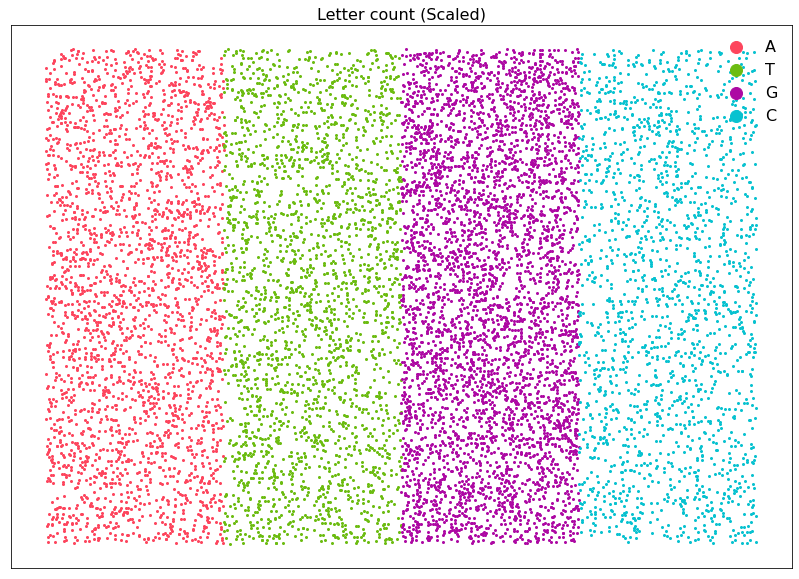

In [5]:
a_s = np.random.uniform(0,10,size = int(reads_data['A'].sum()/10))
t_s = np.random.uniform(0,10,size = int(reads_data['T'].sum()/10))
g_s = np.random.uniform(0,10,size = int(reads_data['G'].sum()/10))
c_s = np.random.uniform(0,10,size = int(reads_data['C'].sum()/10))

fig, ax = plt.subplots()
ax.scatter(np.random.uniform(0,1,len(a_s)), a_s, c = '#FD455D',s=4, label='A')
ax.scatter(np.random.uniform(0,1,len(t_s)) + 1, t_s, c = '#6CBC11',s=4, label = 'T')
ax.scatter(np.random.uniform(0,1,len(g_s)) + 2, g_s, c = '#AD09A3',s=4, label = 'G')
ax.scatter(np.random.uniform(0,1,len(c_s)) + 3, c_s, c = '#08C2D0',s=4, label = 'C')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Letter count (Scaled)', size=16)
ax.legend(prop={'size': 16},frameon=False,markerscale=6)


fig.set_figwidth(14)
fig.set_figheight(10)   

plt.show()

## 2) Отбор необходимых данных 

In [6]:
mean_mathces = reads_data['matches'].mean() 
subset_mathces = reads_data.query('matches > @mean_mathces') \
    [['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]

In [7]:
path_to = './'
subset_mathces.to_csv(os.path.join(path_to,'train_part.csv'), header=True)

## 3) Сделать небольшой EDA

The most paid athletes 1990-2020 dataset ([link](https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019))

In [8]:
atheletes = pd.read_csv('./Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv', index_col=0)

In [9]:
atheletes.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [10]:
atheletes.index = atheletes.index - 1

In [11]:
atheletes.describe()

,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


In [12]:
atheletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


In [13]:
atheletes.shape

(301, 7)

In [14]:
atheletes.isnull().sum()

Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [15]:
# Rename some columns for convenience
atheletes.rename(columns={'earnings ($ million)':'earned', 'Current Rank':'Cur_rank', 
                         'Previous Year Rank' : 'Prev_year'}, inplace=True)

In [16]:
# Let's find the athlete who earned the most money in a year
atheletes.iloc[atheletes['earned'].idxmax(),:]['Name']

'Floyd Mayweather'

In [17]:
# Let's find the athlete who earned the least money in a year
atheletes.iloc[atheletes['earned'].idxmin(),:]['Name'] # Surprisingly it is him

'Michael Jordan'

In [18]:
# Let's find the athletes who earned the most money during this period (1990-2020)
top_10_atheletes = atheletes.groupby('Name').agg({'earned': 'sum'}).sort_values(by='earned',ascending=False)\
    .reset_index().head(10)
top_10_atheletes

,Name,earned
0,Tiger Woods,1373.8
1,LeBron James,844.8
2,Floyd Mayweather,840.0
3,Cristiano Ronaldo,787.1
4,Roger Federer,781.1
5,Michael Jordan,738.8
6,Lionel Messi,715.5
7,Michael Schumacher,639.0
8,Kobe Bryant,601.1
9,Phil Mickelson,519.9


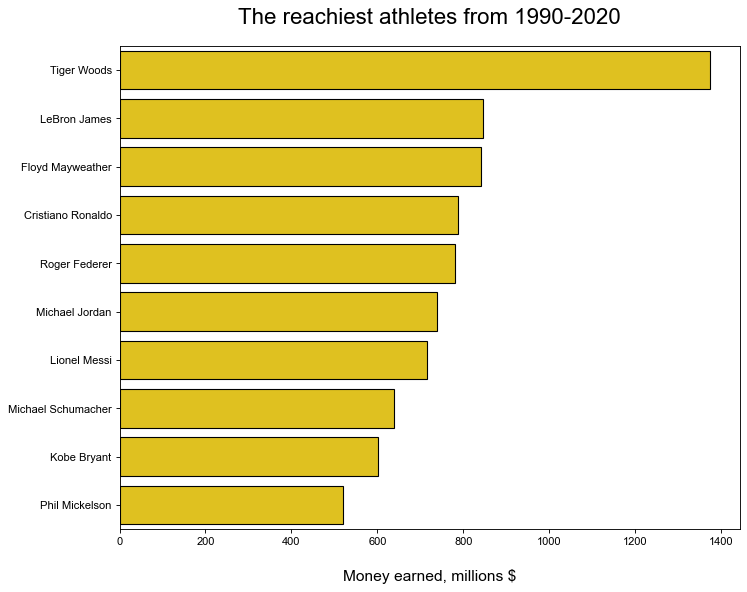

In [19]:
# Btw we can visualize these top10 atheletes:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_dpi(80)
sns.set_theme(style="whitegrid")
sns.barplot(y = 'Name', x = 'earned', data = top_10_atheletes, color = 'gold', edgecolor='black')
ax.set_ylabel('')
ax.set_xlabel('Money earned, millions $', size=14,labelpad= 20)
ax.set_title('The reachiest athletes from 1990-2020', size = 20, pad=20);

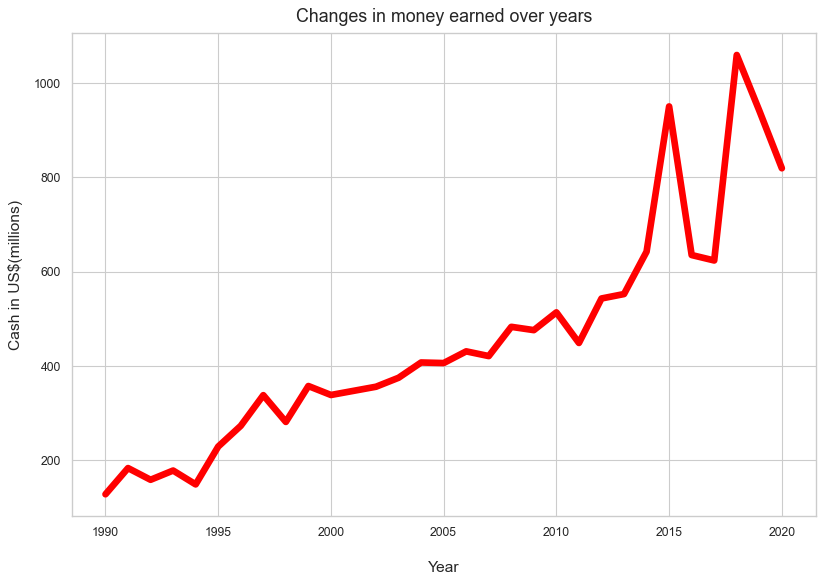

In [20]:
# Changes in total earning cash over the years
cash_changes = atheletes.groupby('Year').agg({'earned':'sum'}).reset_index()
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.set_dpi(80)

ax.plot(cash_changes['Year'], cash_changes['earned'],ls='-',lw=6, color='red')
ax.set_title('Changes in money earned over years', size = 16, pad = 10)
ax.set_ylabel('Cash in US$(millions)', size = 14, labelpad = 10)
ax.set_xlabel('Year', size = 14, labelpad = 20);

In [21]:
# Let's see the nationality distribution:
atheletes_without_duplicates = atheletes.drop_duplicates(['Name'])
atheletes_without_duplicates['Nationality'].value_counts() # As expected:)

USA                 56
Canada               4
UK                   3
Brazil               3
Philippines          1
Ireland              1
Northern Ireland     1
Serbia               1
Spain                1
Argentina            1
Portugal             1
Finland              1
Switzerland          1
Italy                1
Russia               1
Germany              1
Austria              1
Australia            1
France               1
Mexico               1
Name: Nationality, dtype: int64

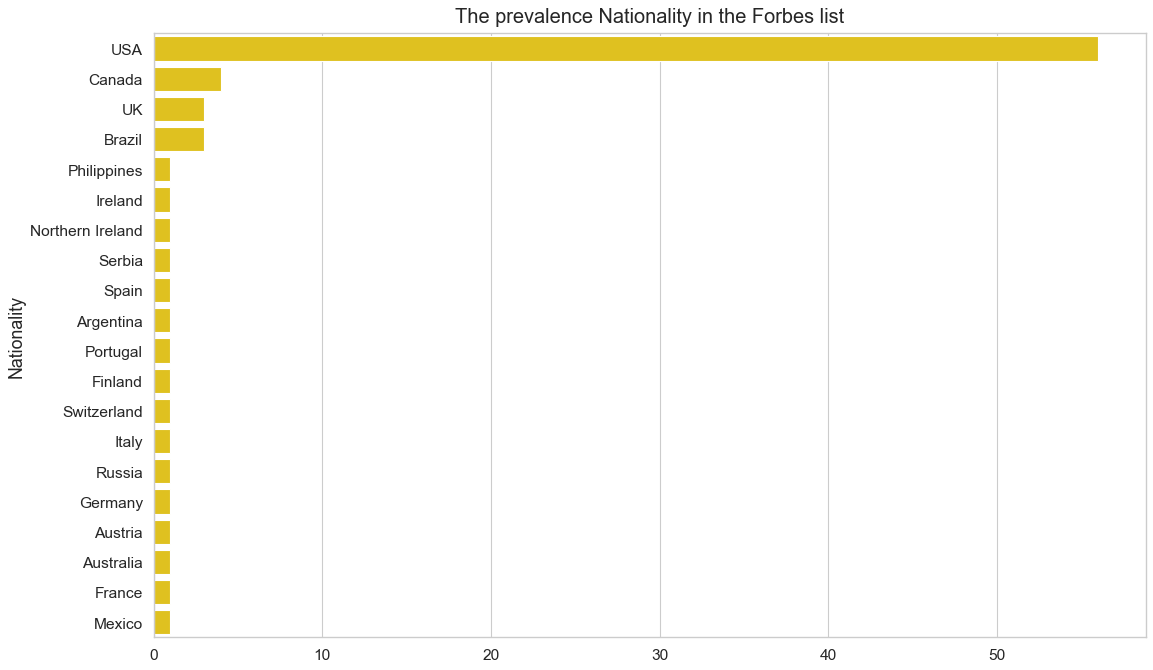

In [22]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
fig.set_dpi(80)

sns.set_theme(style="white")
sns.countplot(y = 'Nationality',data=atheletes_without_duplicates, color='gold',alpha=1,
             order=atheletes_without_duplicates['Nationality'].value_counts().index)
ax.set_title('The prevalence Nationality in the Forbes list', size = 18, pad = 10)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_ylabel(ylabel='Nationality', fontsize=16)
ax.set_xlabel('');

In [23]:
atheletes[atheletes['Nationality'] == 'Russia'] # Here is a single Russian athelet in this list

,Name,Nationality,Cur_rank,Prev_year,Sport,Year,earned
S.NO,,,,,,,
82,Sergei Federov,Russia,3,NaN,Ice Hockey,1998,29.8


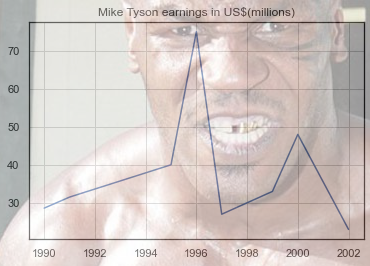

In [24]:
# How Tyson's cash changed over these years
im = image.imread('./tyson.jpeg')
tyson = atheletes[atheletes['Name']=='Mike Tyson']
fig, ax = plt.subplots()
ax.grid()
ax.plot('Year','earned',data=tyson)
ax.set_title("Mike Tyson earnings in US$(millions)")
fig.figimage(im, -90, -90,cmap='ocean', alpha=.4)
plt.show()

There are dozen of other option to perform EDA on this dataset.

## 4) Работа с реальными данными

In [44]:
def read_gff(path_to, fields=None):
    """Reads .gff file and returns pandas.Dataframe.
    path_to - path to .gff file can be absolute and relative.
    fields - column names, recieves a list(optional)"""
    if fields is None:
        fields = ['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    gff = pd.read_csv(path_to, sep='\t', comment='#', names=fields)
    return gff


def read_bed6(path_to, fields=None):
    """Read .bed file and returns pandas.Dataframe.
    path_to - path to .bed file can be absolute and relative.
    fields - column names, recieves a list(optional)"""
    if fields is None:
        fields = ['chromosome', 'start', 'end', 'name', 'score', 'strand']
    bed = pd.read_csv(path_to, sep='\t', comment='#', names=fields)
    return bed


In [45]:
gff = read_gff('./rrna_annotation.gff')

In [27]:
bed6 = read_bed6('./alignment.bed')

In [28]:
gff.head(3)

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA


In [29]:
bed6.head(3)

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+


In [30]:
# Extract rRNA type in a 'attribute' column
gff['attributes'] = gff['attributes'].str.extract(r'(\d+S)')

In [31]:
gff.head(3)

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S


In [32]:
bed6.shape

(7710, 6)

In [33]:
rna_table = pd.DataFrame(gff.groupby(['chromosome'])['attributes'].value_counts()).rename(columns={'attributes':'count'})

In [34]:
rna_table.head(11)

count
chromosome   attributes       
Reference_1  16S             2
             23S             2
             5S              2
Reference_10 16S             5
             23S             5
Reference_11 16S             2
             23S             2
             5S              2
Reference_12 16S             2
             23S             2
             5S              2

In [35]:
rna_table = rna_table.unstack(level=(0)).T
rna_table = rna_table.droplevel(level=0, axis=0)

/var/folders/w8/hw1zjhy15ylfl_tjlk0h4zbh0000gn/T/ipykernel_8174/4035871561.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(ind)
/var/folders/w8/hw1zjhy15ylfl_tjlk0h4zbh0000gn/T/ipykernel_8174/4035871561.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(ind)
/var/folders/w8/hw1zjhy15ylfl_tjlk0h4zbh0000gn/T/ipykernel_8174/4035871561.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.set_xticklabels(ind)


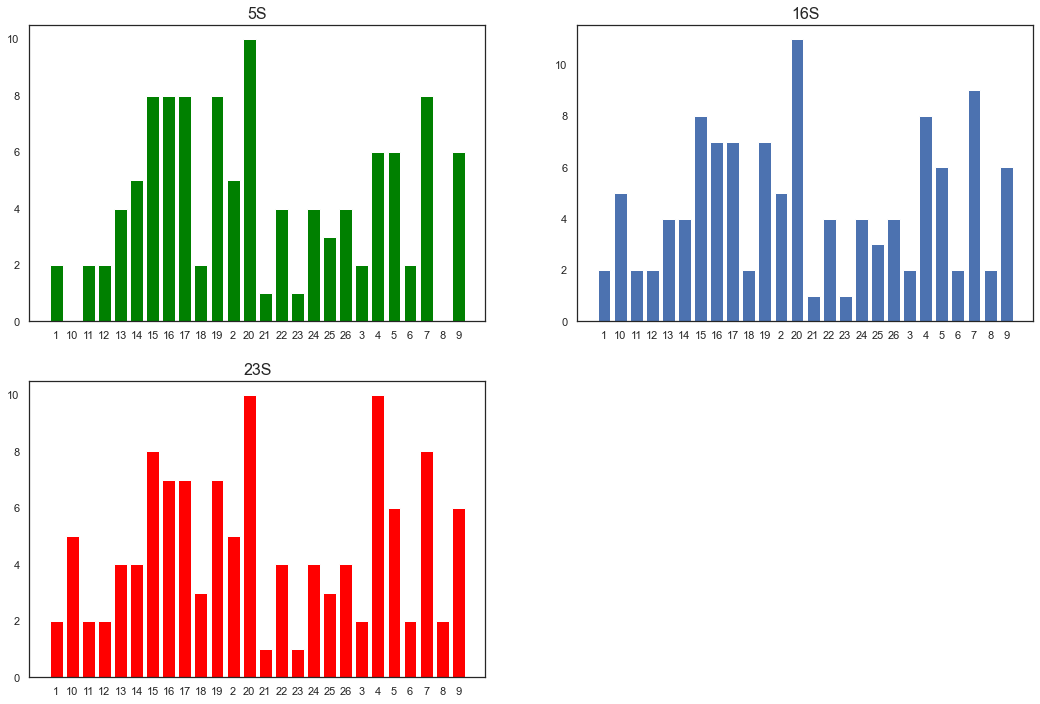

In [36]:
ind = [i.replace('Reference_','') for i in rna_table.index]
fig = plt.figure()

fig.set_figwidth(18)
fig.set_figheight(12)
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)

ax_1.bar(x = rna_table.index,height=rna_table['5S'], color='green')
ax_1.set_xticklabels(ind)
ax_1.set_title('5S',size = 16)

ax_2.bar(x = rna_table.index,height=rna_table['16S'])
ax_2.set_xticklabels(ind)
ax_2.set_title('16S',size = 16)

ax_3.bar(x = rna_table.index,height=rna_table['23S'],color='red')
ax_3.set_xticklabels(ind)
ax_3.set_title('23S',size = 16);

In [37]:
gff.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


In [38]:
bed6.head()

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [39]:
bed6.shape

(7710, 6)

In [40]:
bed_combined = gff.merge(bed6, how='right', on='chromosome', suffixes=['_x', '_y'])

In [41]:
bed_combined.head()

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_1,barrnap:0.9,rRNA,198291,199763,0.000000e+00,+,.,16S,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,barrnap:0.9,rRNA,200189,203097,0.000000e+00,+,.,23S,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
2,Reference_1,barrnap:0.9,rRNA,203221,203321,1.800000e-11,+,.,5S,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
3,Reference_1,barrnap:0.9,rRNA,1763983,1764083,1.800000e-11,-,.,5S,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
4,Reference_1,barrnap:0.9,rRNA,1764208,1767116,0.000000e+00,-,.,23S,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-


In [42]:
bed_intersected = bed_combined[(bed_combined['start_x'] - 1 > bed_combined['start_y']) # If I'am right with indexing
                               &(bed_combined['end_x'] -1 < bed_combined['end_y'])]

In [43]:
bed_intersected.shape

(120, 14)